In [1]:
import torch as t
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Net(nn.Module):
    def __init__(self, N):
        super(Net, self).__init__()
        self.N = N
        self.fc1 = nn.Linear(N*N, 16)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(16, 32)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32, 64)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(64, 1)
        
        
    def forward(self, x: "(B, N, N)"):
        B = x.shape[0]
        x = x.reshape(B, self.N**2)
        assert x.shape == (B, self.N**2)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        assert x.shape == (B, 1)
        return x[:,0]

In [3]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

In [4]:
N = 3
model = Net(N)
loss_func = nn.MSELoss(reduction='mean')

In [5]:
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [6]:
#weights_init(model)
training_size = 50000

max_val = 2.5
#X = np.random.randint(-5, 5, size=(training_size, N, N))
X = (np.random.rand(training_size, N, N)-0.5) * 2* 2.5
print(np.max(X), np.min(X))
Y = np.linalg.det(X)
B = 16
assert training_size%B == 0

losses = []
epochs = 200
for i in range(epochs):
    for j in range(training_size//B):
        x_var = X[j*B:(j+1)*B]
        y_var = Y[j*B:(j+1)*B]
        assert x_var.shape == (B,N,N)
        assert y_var.shape == (B,)
        x_var = t.Tensor(x_var)
        y_var = t.Tensor(y_var)
        
        optimizer.zero_grad()
        y_hat = model(x_var)
        loss = loss_func.forward(y_hat, y_var)
        loss.backward()
        optimizer.step()
        losses.append(float(loss))

        
    if i % 1 == 0:
        print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

2.499981689074751 -2.499968636273505
Epoch: 0, Loss: 19.090435028076172, 
Epoch: 1, Loss: 14.698537826538086, 
Epoch: 2, Loss: 12.149889945983887, 
Epoch: 3, Loss: 7.987018585205078, 
Epoch: 4, Loss: 6.556524276733398, 
Epoch: 5, Loss: 4.791428565979004, 
Epoch: 6, Loss: 5.456320285797119, 
Epoch: 7, Loss: 4.7907562255859375, 
Epoch: 8, Loss: 4.2382402420043945, 
Epoch: 9, Loss: 4.941814422607422, 
Epoch: 10, Loss: 4.28800630569458, 
Epoch: 11, Loss: 4.4508209228515625, 
Epoch: 12, Loss: 4.033071041107178, 
Epoch: 13, Loss: 2.774224281311035, 
Epoch: 14, Loss: 2.6835246086120605, 
Epoch: 15, Loss: 2.6997265815734863, 
Epoch: 16, Loss: 2.6524744033813477, 
Epoch: 17, Loss: 2.701122283935547, 
Epoch: 18, Loss: 2.598120927810669, 
Epoch: 19, Loss: 2.509706497192383, 
Epoch: 20, Loss: 2.394188404083252, 
Epoch: 21, Loss: 1.8412880897521973, 
Epoch: 22, Loss: 1.8754464387893677, 
Epoch: 23, Loss: 1.9638334512710571, 
Epoch: 24, Loss: 1.497748613357544, 
Epoch: 25, Loss: 1.6350213289260864, 

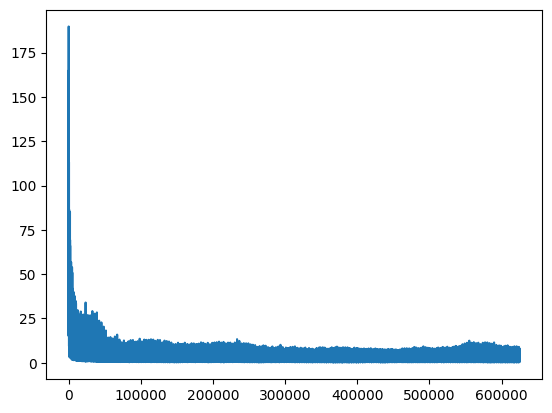

In [7]:
plt.plot(losses)